In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report

from rtbm import RTBM, minimizer

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy


In [2]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

3


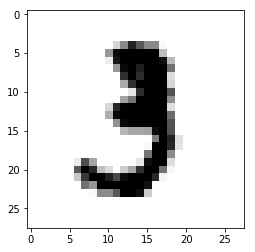

In [3]:
# Visualize individual pics
i=10
print(Y_train[i])
I=np.reshape(X_train[i], (28,28))
plt.imshow(I, interpolation='nearest',  cmap='gray_r')
plt.show()

# Logistic regression baseline

In [ ]:
# Logistic regression baseline
logreg = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')

logreg.fit(X_train,Y_train)


In [ ]:
# On train set

P=logreg.predict(X_train)

print(classification_report(Y_train,P))
print(confusion_matrix(Y_train, P))


In [ ]:
# On test set
P=logreg.predict(X_test)

print(classification_report(Y_test,P))
print(confusion_matrix(Y_test, P))


# Linear regression base line

In [ ]:
linreg = linear_model.LinearRegression()

linreg.fit(X_train,Y_train)


In [ ]:
# On train set

P=np.round(linreg.predict(X_train))

print(classification_report(Y_train,P))
print(confusion_matrix(Y_train, P))

In [ ]:
# On test set
P=linreg.predict(X_test)

print(classification_report(Y_test,P))
print(confusion_matrix(Y_test, P))


# Linear regression via CMA

In [ ]:
M = mdl.Model()
M.add(layers.Linear(784,1,paramBound=2))

minim = minimizer.CMA(False)
sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
# On train set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
# On test set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))

# Linear regression via SGD

In [ ]:
M = mdl.Model()
M.add(layers.Linear(784,1))

minim = minimizer.SGD()
sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), lr=0.01, maxiter=1000)

In [ ]:
# On train set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
# On test set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))


# E(h|v) via SGD

In [3]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(784,10))
M.add(layers.DiagExpectationUnitLayer(10,1))

minim = minimizer.SGD()
sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train),lr=0.1,momentum=0.5, nesterov=True,noise=1, maxiter=1000)

Iteration 0 in 7.56(s), cost = 14.429409
Iteration 100 in 815.80(s), cost = 2.250890
Iteration 200 in 1624.00(s), cost = 1.968019
Iteration 300 in 2411.39(s), cost = 1.823723
Iteration 400 in 3112.41(s), cost = 1.744822
Iteration 500 in 3891.12(s), cost = 1.699157
Iteration 600 in 4684.85(s), cost = 1.669940
Iteration 700 in 5463.40(s), cost = 1.648846
Iteration 800 in 6207.63(s), cost = 1.632329
Iteration 900 in 6944.76(s), cost = 1.618429
('Cost: ', (1.6066652495271077+0j))
('Sol: ', array([-1.11242407+0.j,  0.53777767+0.j,  0.91301536+0.j, ...,
       -0.43379221+0.j, -0.86620570+0.j,  1.70059510+0.j]))
Time: 7664 s


In [4]:
# On train set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

             precision    recall  f1-score   support

        0.0       0.79      0.20      0.32      1001
        1.0       0.30      0.21      0.25      1127
        2.0       0.19      0.25      0.22       991
        3.0       0.25      0.32      0.28      1032
        4.0       0.12      0.17      0.14       980
        5.0       0.17      0.30      0.22       863
        6.0       0.18      0.27      0.22      1014
        7.0       0.29      0.31      0.30      1070
        8.0       0.15      0.11      0.13       944
        9.0       0.54      0.12      0.20       978
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0
       12.0       0.00      0.00      0.00         0

avg / total       0.30      0.23      0.23     10000

[[198 379 236 109  43  22  11   3   0   0   0   0   0]
 [  4 239 527 238  85  26   6   2   0   0   0   0   0]
 [ 32 113 244 303 179  85  29   5   1   0   0   0   0]
 [ 12  59 190 328 259 111  40  19  10

In [5]:
# On test set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))



             precision    recall  f1-score   support

        0.0       0.76      0.19      0.30       980
        1.0       0.29      0.20      0.24      1135
        2.0       0.17      0.22      0.19      1032
        3.0       0.24      0.30      0.27      1010
        4.0       0.12      0.15      0.13       982
        5.0       0.17      0.30      0.22       892
        6.0       0.16      0.24      0.19       958
        7.0       0.25      0.29      0.27      1028
        8.0       0.17      0.12      0.14       974
        9.0       0.47      0.09      0.15      1009
       10.0       0.00      0.00      0.00         0
       11.0       0.00      0.00      0.00         0

avg / total       0.28      0.21      0.21     10000

[[182 350 241 122  52  22   8   3   0   0   0   0]
 [  2 229 570 217  82  28   6   1   0   0   0   0]
 [ 38 140 227 289 193 113  24   6   1   0   1   0]
 [ 13  64 189 304 235 137  45  12  10   1   0   0]
 [  0   0   5  36 148 322 284 141  39   6   1   0]


# E(h|v) via CMA

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(784,1))

minim = minimizer.CMA(True)
sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
# On train set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
# On test set
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))

print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))
